<a href="https://colab.research.google.com/github/lcphy/Digital-Innovation-Lab/blob/master/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [0]:
#EVERY TIME THE DATASET IS RETRIEVED FROM DRIVE

input_file = 'https://raw.githubusercontent.com/lcphy/Digital-Innovation-Lab/master/bank-full.csv'
dataset = pd.read_csv(input_file, sep=';', header = 0) 

In [41]:
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [0]:
#DELETE NEXT CALLS DATA

dataset = dataset.drop("contact", axis=1)
dataset = dataset.drop("day", axis=1)
dataset = dataset.drop("month", axis=1)
dataset = dataset.drop("duration", axis=1)
dataset = dataset.drop("campaign", axis=1)
dataset = dataset.drop("pdays", axis=1)
dataset = dataset.drop("previous", axis=1)
dataset = dataset.drop("poutcome", axis=1)

In [43]:
dataset.head()

,age,job,marital,education,default,balance,housing,loan,y
0,58,management,married,tertiary,no,2143,yes,no,no
1,44,technician,single,secondary,no,29,yes,no,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,no
3,47,blue-collar,married,unknown,no,1506,yes,no,no
4,33,unknown,single,unknown,no,1,no,no,no


In [0]:
#FEATURE ENGINEERING

cleanup_nums = {"marital":     {"married": 1, "single": 0, "divorced":-1},
                "education": {"primary": 1, "secondary": 2, "tertiary": 3},
               "default":     {"yes": 1, "no": 0},
               "housing":     {"yes": 1, "no": 0},
               "loan":     {"yes": 1, "no": 0},
               "y":     {"yes": 1, "no": 0}}

In [45]:
dataset.replace(cleanup_nums, inplace=True)
dataset.head()

,age,job,marital,education,default,balance,housing,loan,y
0,58,management,1,3,0,2143,1,0,0
1,44,technician,0,2,0,29,1,0,0
2,33,entrepreneur,1,2,0,2,1,1,0
3,47,blue-collar,1,unknown,0,1506,1,0,0
4,33,unknown,0,unknown,0,1,0,0,0


In [46]:
dataset.dtypes

age           int64
job          object
marital       int64
education    object
default       int64
balance       int64
housing       int64
loan          int64
y             int64
dtype: object

In [0]:
dataset = dataset[dataset.job != 'unknown']
dataset = dataset[dataset.education != 'unknown']
dataset['education'] = dataset['education'].astype(int)

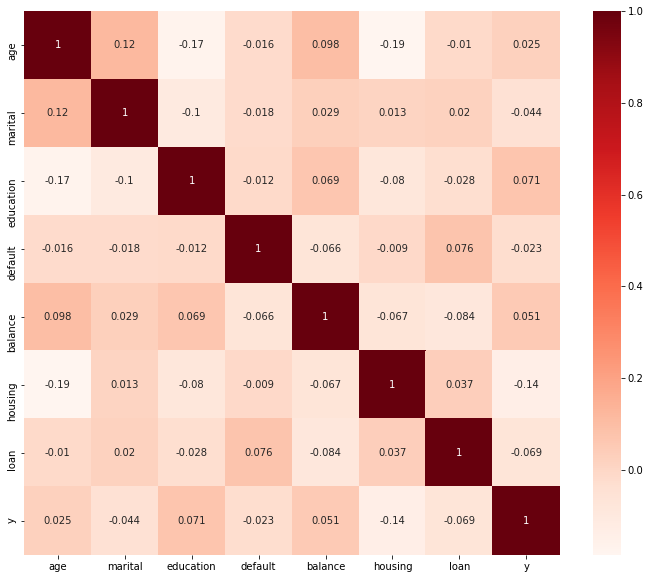

In [48]:
#COLLERATION MATRIX

plt.figure(figsize=(12,10))
cor = dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [0]:
#CLASSIFIFICATION

X = dataset.iloc[:, 0:7]
y = dataset.iloc[:, 7]

In [0]:
X = pd.get_dummies(X, columns=["job"], prefix=["job"])

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [0]:
#DECISION TREE

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier()
clt_dt = clf_dt.fit(X_train,y_train)

esito = clf_dt.predict(X_test)

In [53]:
target_names = ['NOT-sub', 'Subscribed']
print(classification_report(y_test, esito,target_names=target_names))

              precision    recall  f1-score   support

     NOT-sub       0.87      0.87      0.87      9071
  Subscribed       0.31      0.31      0.31      1728

    accuracy                           0.78     10799
   macro avg       0.59      0.59      0.59     10799
weighted avg       0.78      0.78      0.78     10799



In [54]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, esito)
print(cm)

[[7849 1222]
 [1186  542]]


(array([9035.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1764.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

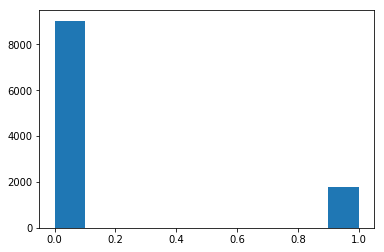

In [55]:
plt.hist(esito)

In [56]:
#RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier

clf_dt = RandomForestClassifier()
clt_dt = clf_dt.fit(X_train,y_train)

esito = clf_dt.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [57]:
target_names = ['NOT-sub', 'Subscribed']
print(classification_report(y_test, esito,target_names=target_names))

              precision    recall  f1-score   support

     NOT-sub       0.86      0.94      0.90      9071
  Subscribed       0.39      0.19      0.26      1728

    accuracy                           0.82     10799
   macro avg       0.63      0.57      0.58     10799
weighted avg       0.79      0.82      0.80     10799



In [58]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, esito)
print(cm)

[[8566  505]
 [1399  329]]


(array([9965.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         834.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

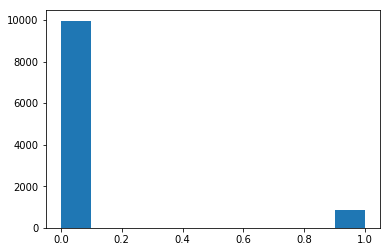

In [59]:
plt.hist(esito)

In [0]:
# K-NEAREST NEIGHBOURS

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# TRAINING - TEST
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# SCALING
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# FITTING
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# PREDICTION
y_pred = classifier.predict(X_test)

# CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [61]:
target_names = ['NOT-sub', 'Subscribed']
print(classification_report(y_test, y_pred,target_names=target_names))

              precision    recall  f1-score   support

     NOT-sub       0.85      0.95      0.90      9120
  Subscribed       0.29      0.10      0.15      1679

    accuracy                           0.82     10799
   macro avg       0.57      0.53      0.52     10799
weighted avg       0.76      0.82      0.78     10799



In [62]:
print(cm)

[[8704  416]
 [1513  166]]


(array([10217.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   582.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

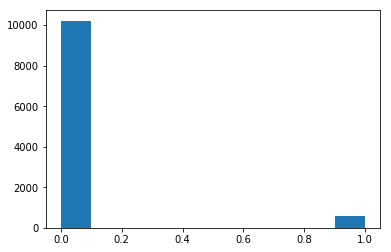

In [63]:
plt.hist(y_pred)

In [0]:
#UNDERSAMPLING

from sklearn.utils import resample

dataset_sample = pd.get_dummies(dataset, columns=["job"], prefix=["job"])

#SPLIT FEATURE AND TARGET
y = dataset_sample.y
X = dataset_sample.drop('y', axis=1)

#TRAIN TEST
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [0]:
X = pd.concat([X_train, y_train], axis=1)

In [0]:
#SELECTING TARGET CLASSES

not_sub = X[X.y==0]
sub = X[X.y==1]

In [0]:
not_sub_downsampled = resample(not_sub,
                                replace = False,
                                n_samples = len(sub),
                                random_state = 27)

# COMBINE MINORITY AND DOWNSAMPLED MAJORITY
downsampled = pd.concat([not_sub_downsampled, sub])

In [0]:
#DECISION TREE

y_train = downsampled.y
X_train = downsampled.drop('y', axis=1)

clf_dt = DecisionTreeClassifier()
clt_dt = clf_dt.fit(X_train,y_train)

esito = clf_dt.predict(X_test)

In [69]:
target_names = ['NOT-sub', 'Subscribed']
print(classification_report(y_test, esito,target_names=target_names))

              precision    recall  f1-score   support

     NOT-sub       0.93      0.58      0.71      9577
  Subscribed       0.16      0.65      0.26      1222

    accuracy                           0.59     10799
   macro avg       0.55      0.61      0.49     10799
weighted avg       0.84      0.59      0.66     10799



In [70]:
#RANDOM FOREST
y_train = downsampled.y
X_train = downsampled.drop('y', axis=1)

clf_dt = RandomForestClassifier()
clt_dt = clf_dt.fit(X_train,y_train)

esito = clf_dt.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [71]:
target_names = ['NOT-sub', 'Subscribed']
print(classification_report(y_test, esito,target_names=target_names))

              precision    recall  f1-score   support

     NOT-sub       0.93      0.65      0.76      9577
  Subscribed       0.18      0.61      0.28      1222

    accuracy                           0.64     10799
   macro avg       0.55      0.63      0.52     10799
weighted avg       0.84      0.64      0.71     10799



In [72]:
#SMOTE - DECISION TREE

from imblearn.over_sampling import SMOTE

#SPLIT FEATURE TARGET
y = dataset_sample.y
X = dataset_sample.drop('y', axis=1)

#TRAIN TEST
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#SMOTE
sm = SMOTE(random_state=27, ratio=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)

clf_dt = DecisionTreeClassifier()

#FIT
smote = clf_dt.fit(X_train,y_train)

#PREDICITON
smote_pred = smote.predict(X_test)

target_names = ['NOT-sub', 'Subscribed']
print(classification_report(y_test, smote_pred,target_names=target_names))

              precision    recall  f1-score   support

     NOT-sub       0.91      0.88      0.90      9577
  Subscribed       0.27      0.36      0.31      1222

    accuracy                           0.82     10799
   macro avg       0.59      0.62      0.60     10799
weighted avg       0.84      0.82      0.83     10799



In [73]:
#SMOTE - RANDOM FOREST

from imblearn.over_sampling import SMOTE

y = dataset_sample.y
X = dataset_sample.drop('y', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

sm = SMOTE(random_state=27, ratio=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)

clf_dt = RandomForestClassifier()

smote = clf_dt.fit(X_train,y_train)

smote_pred = smote.predict(X_test)

target_names = ['NOT-sub', 'Subscribed']
print(classification_report(y_test, smote_pred,target_names=target_names))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

     NOT-sub       0.91      0.91      0.91      9577
  Subscribed       0.31      0.31      0.31      1222

    accuracy                           0.84     10799
   macro avg       0.61      0.61      0.61     10799
weighted avg       0.84      0.84      0.84     10799



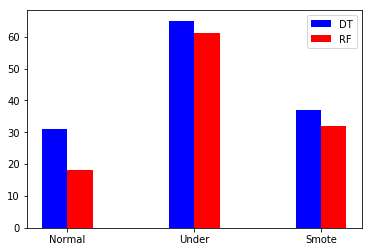

In [74]:
#RECAP on RECALL

x = np.arange(3)
plt.bar(x-0.2, [31,65,37], width=0.2, color='b', align='center', label='DT')
plt.bar(x, [18,61,32], width=0.2, color='r', align='center', label='RF')
plt.xticks(x-0.1, ['Normal','Under','Smote'])
plt.legend(loc='upper right')

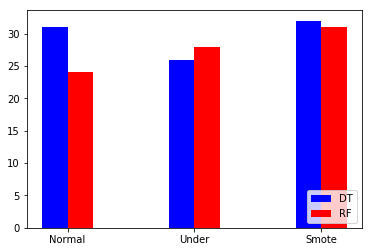

In [75]:
#RECAP on F1

x = np.arange(3)
plt.bar(x-0.2, [31,26,32], width=0.2, color='b', align='center', label='DT')
plt.bar(x, [24,28,31], width=0.2, color='r', align='center', label='RF')
plt.xticks(x-0.1, ['Normal','Under','Smote'])
plt.legend(loc='lower right')